Author: Santiago García López
Programación para analítica de datos

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

DATASET winequality-red.csv

In [4]:
file_1 = '/content/winequality-red.csv'
df = pd.read_csv(file_1, sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

fixed acidity
False    1599
Name: fixed acidity, dtype: int64

volatile acidity
False    1599
Name: volatile acidity, dtype: int64

citric acid
False    1599
Name: citric acid, dtype: int64

residual sugar
False    1599
Name: residual sugar, dtype: int64

chlorides
False    1599
Name: chlorides, dtype: int64

free sulfur dioxide
False    1599
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    1599
Name: total sulfur dioxide, dtype: int64

density
False    1599
Name: density, dtype: int64

pH
False    1599
Name: pH, dtype: int64

sulphates
False    1599
Name: sulphates, dtype: int64

alcohol
False    1599
Name: alcohol, dtype: int64

quality
False    1599
Name: quality, dtype: int64



Evidenciamos que la base no tiene datos faltantes

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Evidenciamos que las columnas 'free sulfur dioxide', 'total sulfur dioxide' tienen tipo de dato entero pero, en realidad, son enteros, por lo que se procede a cambair el tipo de dato

In [6]:
df[['free sulfur dioxide', 'total sulfur dioxide']] = df[['free sulfur dioxide', 'total sulfur dioxide']].astype("int")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
bins = np.linspace(min(df["quality"]), max(df["quality"]), 4)
bins

array([3.        , 4.66666667, 6.33333333, 8.        ])

In [9]:
group_names = ['Low', 'Medium', 'High']

In [10]:
df['quality-binned'] = pd.cut(df['quality'], bins, labels=group_names, include_lowest=True )
df[['quality','quality-binned']].head(20)

,quality,quality-binned
0,5,Medium
1,5,Medium
2,5,Medium
3,6,Medium
4,5,Medium
5,5,Medium
6,5,Medium
7,7,High
8,7,High
9,5,Medium


Text(0.5, 1.0, 'quality bins')

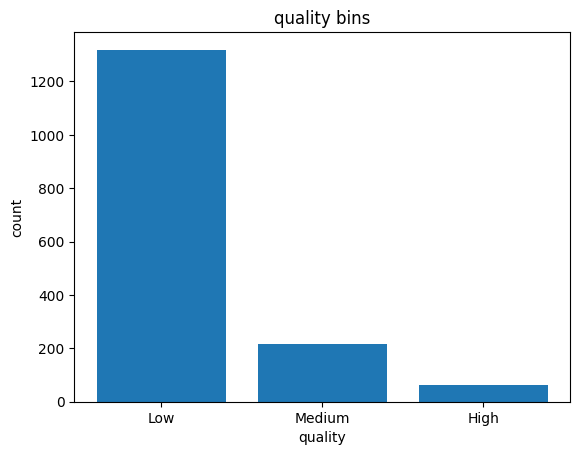

In [11]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["quality-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("quality")
plt.pyplot.ylabel("count")
plt.pyplot.title("quality bins")

In [12]:
df["quality-binned"].value_counts()

Medium    1319
High       217
Low         63
Name: quality-binned, dtype: int64

Encontramos que la gran mayoría de los vinos son de baja calidad, tal y como se evidencia en la gráfica

In [13]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153742,-0.113165,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010416,0.076461,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.061119,0.035560,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.186862,0.203008,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005525,0.047399,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153742,-0.010416,-0.061119,0.186862,0.005525,1.000000,0.667182,-0.021738,0.070500,0.051741,-0.069563,-0.050792
total sulfur dioxide,-0.113165,0.076461,0.035560,0.203008,0.047399,0.667182,1.000000,0.071283,-0.066482,0.042971,-0.205641,-0.185089
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021738,0.071283,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070500,-0.066482,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051741,0.042971,0.148506,-0.196648,1.000000,0.093595,0.251397


Encontramos que no existe una fuerte correlación entre las variables del dataset, pues los valores que arroja la matriz de correlación entre las distintas variables, son todos cercanos a cero

In [14]:

df2 = pd.read_csv('/content/winequality-white.csv', sep = ';')
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
missing_data = df2.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

fixed acidity
False    4898
Name: fixed acidity, dtype: int64

volatile acidity
False    4898
Name: volatile acidity, dtype: int64

citric acid
False    4898
Name: citric acid, dtype: int64

residual sugar
False    4898
Name: residual sugar, dtype: int64

chlorides
False    4898
Name: chlorides, dtype: int64

free sulfur dioxide
False    4898
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    4898
Name: total sulfur dioxide, dtype: int64

density
False    4898
Name: density, dtype: int64

pH
False    4898
Name: pH, dtype: int64

sulphates
False    4898
Name: sulphates, dtype: int64

alcohol
False    4898
Name: alcohol, dtype: int64

quality
False    4898
Name: quality, dtype: int64



In [15]:
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
df2[['free sulfur dioxide', 'total sulfur dioxide']] = df[['free sulfur dioxide', 'total sulfur dioxide']].astype("int")
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Text(0.5, 1.0, 'quality bins')

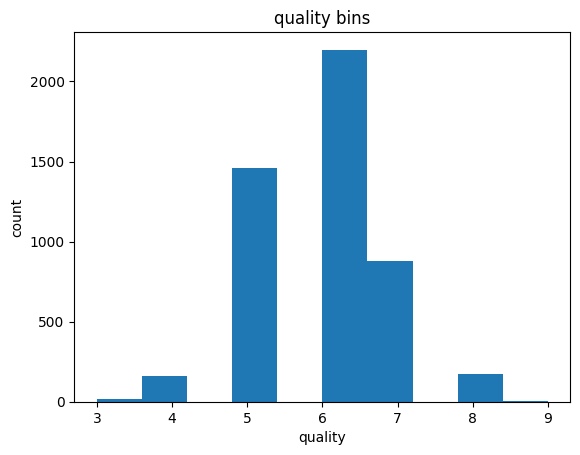

In [17]:
df2["quality"]=df2["quality"].astype(int, copy=True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df2["quality"])

# set x/y labels and plot title
plt.pyplot.xlabel("quality")
plt.pyplot.ylabel("count")
plt.pyplot.title("quality bins")

In [18]:
bins = np.linspace(min(df2["quality"]), max(df2["quality"]), 4)
bins

array([3., 5., 7., 9.])

In [19]:
df2['quality-binned'] = pd.cut(df2['quality'], bins, labels=group_names, include_lowest=True )
df2[['quality','quality-binned']].head(20)

,quality,quality-binned
0,6,Medium
1,6,Medium
2,6,Medium
3,6,Medium
4,6,Medium
5,6,Medium
6,6,Medium
7,6,Medium
8,6,Medium
9,6,Medium


Text(0.5, 1.0, 'quality bins')

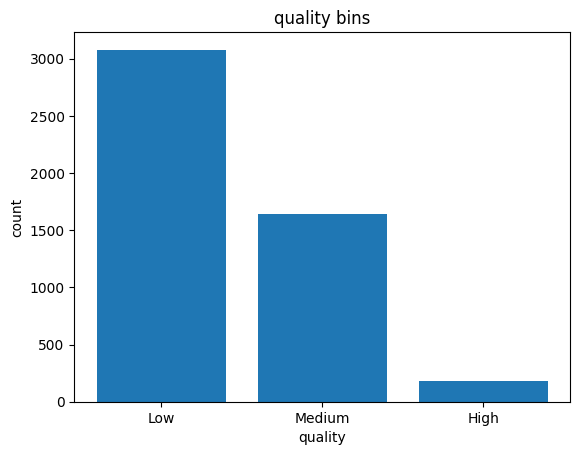

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df2["quality-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("quality")
plt.pyplot.ylabel("count")
plt.pyplot.title("quality bins")

In [21]:
df2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,0.034980,-0.004238,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,0.019477,0.059212,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.060627,-0.001319,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,-0.005990,0.039239,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,-0.001494,0.004291,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,0.034980,0.019477,0.060627,-0.005990,-0.001494,1.000000,0.667182,0.017707,-0.006485,-0.026229,-0.014357,-0.014278
total sulfur dioxide,-0.004238,0.059212,-0.001319,0.039239,0.004291,0.667182,1.000000,0.033723,-0.037157,-0.025700,-0.035584,-0.009913
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.017707,0.033723,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.006485,-0.037157,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,-0.026229,-0.025700,0.074493,0.155951,1.000000,-0.017433,0.053678


El data set de vino blanco tampoco presenta correlaciones significativas

In [22]:
df2["quality-binned"].value_counts()

Medium    3078
Low       1640
High       180
Name: quality-binned, dtype: int64

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

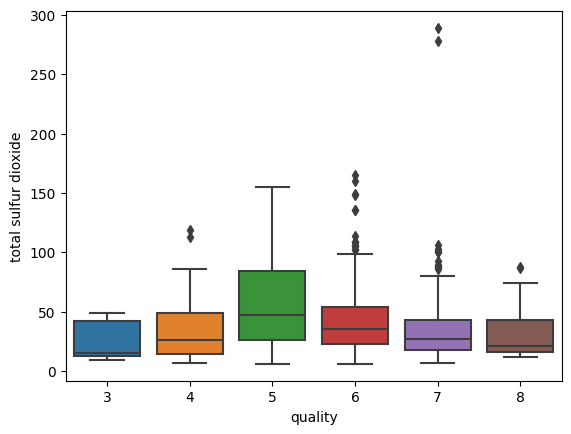

In [23]:
sns.boxplot(x="quality", y="total sulfur dioxide", data=df)


Los vinos rojos de la categoría 3, se caracterizan, en su mayoría, por tener un bajo sulfuro de dioxido

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

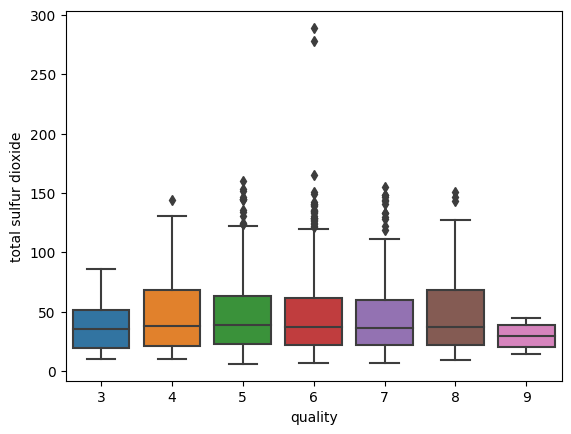

In [24]:
sns.boxplot(x="quality", y="total sulfur dioxide", data=df2)

Se evidenci que en ambos tipos de vino, aquellas unidades que corresponden a la calidad más baja (3), tienen la mediana de los datos muy por debajo que las demás categorías de calidad de vino

In [25]:
white_alcholol=df['alcohol'].astype('float').mean(axis=0)
white_alcholol

10.422983114446529

In [26]:
red_alcholol=df2['alcohol'].astype('float').mean(axis=0)
red_alcholol

10.514267047774602

La media de alcohol de ambos dataset es bastante similar, siendo de 10.42 para el vino rojo y 10.51 para el vino blanco